In [63]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import json

plt.rcParams["figure.figsize"] = (10, 8)

In [3]:
def byteify(input):
    if isinstance(input, dict):
        return {byteify(key):byteify(value) for key,value in input.iteritems()}
    elif isinstance(input, list):
        return [byteify(element) for element in input]
    elif isinstance(input, unicode):
        return input.encode('utf-8')
    else:
        return input

In [4]:
data = []
with open("data/yelp_academic_dataset_review.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
reviews = json_normalize(data)

In [5]:
data = []
with open("data/yelp_academic_dataset_tip.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
tips = json_normalize(data)

In [64]:
set(reviews.columns.tolist()).intersection(tips.columns.tolist())

{'business_id', 'date', 'text', 'type', 'user_id'}

In [6]:
reviews.shape

(230371, 10)

In [66]:
tips.shape

(24072, 6)

In [67]:
# some nan's will exist because of this where reviews columns and tips columns don't match up
reviews_tips = reviews.append(tips)

In [68]:
reviews_tips.shape

(254443, 11)

In [69]:
reviews_tips.columns

Index([u'business_id', u'date', u'likes', u'review_id', u'stars', u'text',
       u'type', u'user_id', u'votes.cool', u'votes.funny', u'votes.useful'],
      dtype='object')

In [70]:
reviews_tips.columns = [u'restaurant_id', u'review_date', u'tip_likes', u'review_id', u'review_stars', u'review_text', u'review_type', u'user_id', u'review_votes.cool', u'review_votes.funny', u'review_votes.useful']

In [71]:
data = []
with open("data/yelp_academic_dataset_user.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
users = json_normalize(data)

In [72]:
users.columns = [u'user_average_stars', u'user_compliments.cool', u'user_compliments.cute', u'user_compliments.funny', u'user_compliments.hot', u'user_compliments.list', u'user_compliments.more', u'user_compliments.note', u'user_compliments.photos', u'user_compliments.plain', u'user_compliments.profile', u'user_compliments.writer', u'user_elite', u'user_fans', u'user_friends', u'user_name', u'user_review_count', u'user_type', u'user_id', u'user_votes.cool', u'user_votes.funny', u'user_votes.useful', u'user_yelping_since']

In [73]:
set(reviews_tips.columns.tolist()).intersection(users.columns.tolist())

{u'user_id'}

In [49]:
users.shape

NameError: name 'users' is not defined

In [62]:
# for index, row in enumerate(df.iterrows()):
#     db[collection].save(row[1].to_json())
for i in reviews.iterrows():
    db['test'].save(json.loads(i[1].to_json()))
    break

InvalidDocument: key 'votes.cool' must not contain '.'

In [75]:
users_reviews_tips = pd.merge(reviews_tips, users, how='left', on='user_id')

In [76]:
users_reviews_tips.shape

(254443, 33)

In [77]:
data = []
with open("data/yelp_academic_dataset_business.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
restaurants = json_normalize(data)

In [78]:
['restaurant_'+i.strip().lower().replace(" ", "_") for i in [u'attributes.Accepts Credit Cards',
                           u'attributes.Ages Allowed',
                                u'attributes.Alcohol',
                        u'attributes.Ambience.casual',
                        u'attributes.Ambience.classy',
                         u'attributes.Ambience.divey',
                       u'attributes.Ambience.hipster',
                      u'attributes.Ambience.intimate',
                      u'attributes.Ambience.romantic',
                      u'attributes.Ambience.touristy',
                        u'attributes.Ambience.trendy',
                       u'attributes.Ambience.upscale',
                                 u'attributes.Attire',
                                   u'attributes.BYOB',
                           u'attributes.BYOB/Corkage',
                    u'attributes.By Appointment Only',
                                 u'attributes.Caters',
                             u'attributes.Coat Check',
                                u'attributes.Corkage',
                               u'attributes.Delivery',
        u'attributes.Dietary Restrictions.dairy-free',
       u'attributes.Dietary Restrictions.gluten-free',
             u'attributes.Dietary Restrictions.halal',
            u'attributes.Dietary Restrictions.kosher',
          u'attributes.Dietary Restrictions.soy-free',
             u'attributes.Dietary Restrictions.vegan',
        u'attributes.Dietary Restrictions.vegetarian',
                           u'attributes.Dogs Allowed',
                             u'attributes.Drive-Thru',
                       u'attributes.Good For Dancing',
                        u'attributes.Good For Groups',
                          u'attributes.Good For Kids',
                     u'attributes.Good For.breakfast',
                        u'attributes.Good For.brunch',
                       u'attributes.Good For.dessert',
                        u'attributes.Good For.dinner',
                     u'attributes.Good For.latenight',
                         u'attributes.Good For.lunch',
                          u'attributes.Good for Kids',
                             u'attributes.Happy Hour',
                                 u'attributes.Has TV',
                 u'attributes.Music.background_music',
                               u'attributes.Music.dj',
                          u'attributes.Music.jukebox',
                          u'attributes.Music.karaoke',
                             u'attributes.Music.live',
                            u'attributes.Music.video',
                            u'attributes.Noise Level',
                          u'attributes.Open 24 Hours',
                       u'attributes.Order at Counter',
                        u'attributes.Outdoor Seating',
                         u'attributes.Parking.garage',
                            u'attributes.Parking.lot',
                         u'attributes.Parking.street',
                          u'attributes.Parking.valet',
                      u'attributes.Parking.validated',
                     u'attributes.Payment Types.amex',
                u'attributes.Payment Types.cash_only',
                 u'attributes.Payment Types.discover',
               u'attributes.Payment Types.mastercard',
                     u'attributes.Payment Types.visa',
                            u'attributes.Price Range',
                                u'attributes.Smoking',
                               u'attributes.Take-out',
                     u'attributes.Takes Reservations',
                         u'attributes.Waiter Service',
                  u'attributes.Wheelchair Accessible',
                                  u'attributes.Wi-Fi',
                                       u'business_id',
                                        u'categories',
                                              u'city',
                                      u'full_address',
                                u'hours.Friday.close',
                                 u'hours.Friday.open',
                                u'hours.Monday.close',
                                 u'hours.Monday.open',
                              u'hours.Saturday.close',
                               u'hours.Saturday.open',
                                u'hours.Sunday.close',
                                 u'hours.Sunday.open',
                              u'hours.Thursday.close',
                               u'hours.Thursday.open',
                               u'hours.Tuesday.close',
                                u'hours.Tuesday.open',
                             u'hours.Wednesday.close',
                              u'hours.Wednesday.open',
                                          u'latitude',
                                         u'longitude',
                                              u'name',
                                     u'neighborhoods',
                                              u'open',
                                      u'review_count',
                                             u'stars',
                                             u'state',
                                              u'type']]

[u'restaurant_attributes.accepts_credit_cards',
 u'restaurant_attributes.ages_allowed',
 u'restaurant_attributes.alcohol',
 u'restaurant_attributes.ambience.casual',
 u'restaurant_attributes.ambience.classy',
 u'restaurant_attributes.ambience.divey',
 u'restaurant_attributes.ambience.hipster',
 u'restaurant_attributes.ambience.intimate',
 u'restaurant_attributes.ambience.romantic',
 u'restaurant_attributes.ambience.touristy',
 u'restaurant_attributes.ambience.trendy',
 u'restaurant_attributes.ambience.upscale',
 u'restaurant_attributes.attire',
 u'restaurant_attributes.byob',
 u'restaurant_attributes.byob/corkage',
 u'restaurant_attributes.by_appointment_only',
 u'restaurant_attributes.caters',
 u'restaurant_attributes.coat_check',
 u'restaurant_attributes.corkage',
 u'restaurant_attributes.delivery',
 u'restaurant_attributes.dietary_restrictions.dairy-free',
 u'restaurant_attributes.dietary_restrictions.gluten-free',
 u'restaurant_attributes.dietary_restrictions.halal',
 u'restaurant_

In [79]:
restaurants.columns = [u'restaurant_attributes.accepts_credit_cards', u'restaurant_attributes.ages_allowed', u'restaurant_attributes.alcohol', u'restaurant_attributes.ambience.casual', u'restaurant_attributes.ambience.classy', u'restaurant_attributes.ambience.divey', u'restaurant_attributes.ambience.hipster', u'restaurant_attributes.ambience.intimate', u'restaurant_attributes.ambience.romantic', u'restaurant_attributes.ambience.touristy', u'restaurant_attributes.ambience.trendy', u'restaurant_attributes.ambience.upscale', u'restaurant_attributes.attire', u'restaurant_attributes.byob', u'restaurant_attributes.byob/corkage', u'restaurant_attributes.by_appointment_only', u'restaurant_attributes.caters', u'restaurant_attributes.coat_check', u'restaurant_attributes.corkage', u'restaurant_attributes.delivery', u'restaurant_attributes.dietary_restrictions.dairy-free', u'restaurant_attributes.dietary_restrictions.gluten-free', u'restaurant_attributes.dietary_restrictions.halal', u'restaurant_attributes.dietary_restrictions.kosher', u'restaurant_attributes.dietary_restrictions.soy-free', u'restaurant_attributes.dietary_restrictions.vegan', u'restaurant_attributes.dietary_restrictions.vegetarian', u'restaurant_attributes.dogs_allowed', u'restaurant_attributes.drive-thru', u'restaurant_attributes.good_for_dancing', u'restaurant_attributes.good_for_groups', u'restaurant_attributes.good_for_kids', u'restaurant_attributes.good_for.breakfast', u'restaurant_attributes.good_for.brunch', u'restaurant_attributes.good_for.dessert', u'restaurant_attributes.good_for.dinner', u'restaurant_attributes.good_for.latenight', u'restaurant_attributes.good_for.lunch', u'restaurant_attributes.good_for_kids', u'restaurant_attributes.happy_hour', u'restaurant_attributes.has_tv', u'restaurant_attributes.music.background_music', u'restaurant_attributes.music.dj', u'restaurant_attributes.music.jukebox', u'restaurant_attributes.music.karaoke', u'restaurant_attributes.music.live', u'restaurant_attributes.music.video', u'restaurant_attributes.noise_level', u'restaurant_attributes.open_24_hours', u'restaurant_attributes.order_at_counter', u'restaurant_attributes.outdoor_seating', u'restaurant_attributes.parking.garage', u'restaurant_attributes.parking.lot', u'restaurant_attributes.parking.street', u'restaurant_attributes.parking.valet', u'restaurant_attributes.parking.validated', u'restaurant_attributes.payment_types.amex', u'restaurant_attributes.payment_types.cash_only', u'restaurant_attributes.payment_types.discover', u'restaurant_attributes.payment_types.mastercard', u'restaurant_attributes.payment_types.visa', u'restaurant_attributes.price_range', u'restaurant_attributes.smoking', u'restaurant_attributes.take-out', u'restaurant_attributes.takes_reservations', u'restaurant_attributes.waiter_service', u'restaurant_attributes.wheelchair_accessible', u'restaurant_attributes.wi-fi', u'restaurant_id', u'restaurant_categories', u'restaurant_city', u'restaurant_full_address', u'restaurant_hours.friday.close', u'restaurant_hours.friday.open', u'restaurant_hours.monday.close', u'restaurant_hours.monday.open', u'restaurant_hours.saturday.close', u'restaurant_hours.saturday.open', u'restaurant_hours.sunday.close', u'restaurant_hours.sunday.open', u'restaurant_hours.thursday.close', u'restaurant_hours.thursday.open', u'restaurant_hours.tuesday.close', u'restaurant_hours.tuesday.open', u'restaurant_hours.wednesday.close', u'restaurant_hours.wednesday.open', u'restaurant_latitude', u'restaurant_longitude', u'restaurant_name', u'restaurant_neighborhoods', u'restaurant_open', u'restaurant_review_count', u'restaurant_stars', u'restaurant_state', u'restaurant_type']

In [80]:
restaurants.shape

(1930, 95)

In [81]:
set(users_reviews_tips.columns.tolist()).intersection(restaurants.columns.tolist())

{u'restaurant_id'}

In [82]:
restaurants.shape

(1930, 95)

In [83]:
restaurants_users_reviews_tips = pd.merge(users_reviews_tips, restaurants, how='outer', on='restaurant_id')

In [84]:
restaurants_users_reviews_tips.shape

(254443, 127)

In [85]:
data = []
with open("data/yelp_academic_dataset_checkin.json", 'r') as f:
    for line in f:
        data.append(byteify(json.loads(line)))
checkins = pd.DataFrame(data)

In [86]:
set(restaurants_users_reviews_tips.columns.tolist()).intersection(checkins.columns.tolist())

set()

In [87]:
checkins.columns = [u'restaurant_id', u'checkin_info', u'checkin_type']

In [88]:
checkins.shape

(1630, 3)

In [89]:
full_features = pd.merge(restaurants_users_reviews_tips, checkins, how='left', on='restaurant_id')

In [90]:
full_features.shape

(254443, 129)

In [91]:
id_map = pd.read_csv("data/restaurant_ids_to_yelp_ids.csv")

In [92]:
id_dict = {}
# each Yelp ID may correspond to up to 4 Boston IDs
for i, row in id_map.iterrows():
    # get the Boston ID
    boston_id = row["restaurant_id"]
    
    # get the non-null Yelp IDs
    non_null_mask = ~pd.isnull(row.ix[1:])
    yelp_ids = row[1:][non_null_mask].values
    
    for yelp_id in yelp_ids:
        id_dict[yelp_id] = boston_id

In [93]:
# replace yelp business_id with boston restaurant_id
map_to_boston_ids = lambda yelp_id: id_dict[yelp_id] if yelp_id in id_dict else np.nan
full_features.restaurant_id = full_features.restaurant_id.map(map_to_boston_ids)


In [94]:
full_features.shape

(254443, 129)

In [95]:
# drop restaurants not found in boston data
full_features = full_features[pd.notnull(full_features.restaurant_id)]

In [96]:
full_features.shape

(252767, 129)

In [97]:
training_response = pd.read_csv("data/train_labels.csv", index_col=None)
training_response.columns = ['inspection_id', 'inspection_date', 'restaurant_id', 'score_lvl_1', 'score_lvl_2', 'score_lvl_3']

In [98]:
training_response.shape

(27088, 6)

In [99]:
training_response.columns.tolist()

['inspection_id',
 'inspection_date',
 'restaurant_id',
 'score_lvl_1',
 'score_lvl_2',
 'score_lvl_3']

In [100]:
training_response['inspection_date'] = pd.to_datetime(pd.Series(training_response.inspection_date))

In [101]:
# training_response['inspection_date']

In [102]:
set(full_features.columns.tolist()).intersection(training_response.columns.tolist())

{'restaurant_id'}

In [103]:
training_response.dtypes

inspection_id               int64
inspection_date    datetime64[ns]
restaurant_id              object
score_lvl_1                 int64
score_lvl_2                 int64
score_lvl_3                 int64
dtype: object

In [104]:
full_features_response = pd.merge(full_features, training_response, on='restaurant_id')

In [105]:
full_features_response.shape

(4071065, 134)

In [106]:
full_features_response[['review_date', 'inspection_date']].dtypes

review_date                object
inspection_date    datetime64[ns]
dtype: object

In [107]:
no_future = full_features_response[full_features_response.inspection_date > full_features_response.review_date]

In [108]:
no_future.shape

(0, 134)

In [109]:
no_future[pd.notnull(no_future.restaurant_id)].shape

(0, 134)

In [110]:
# no_future['time_delta'] = (no_future.inspection_date - no_future.review_date).astype('timedelta64[D]')

# restaurant_cats = pd.Categorical.from_array(no_future.restaurant_id)
# no_future['restaurant_id_number'] = restaurant_cats.codes

# no_future['vote_cool'] = [i[1]['cool'] for i in no_future.review_votes.iteritems()]
# no_future['vote_funny'] = [i[1]['funny'] for i in no_future.review_votes.iteritems()]
# no_future['vote_useful'] = [i[1]['useful'] for i in no_future.review_votes.iteritems()]
# no_future = no_future.drop('review_votes')


In [64]:
pickled = pd.read_pickle('models/training_df.pkl')

In [33]:
store = pd.HDFStore('models/mystore.h5')

In [18]:
# del pickled

In [29]:
test = pickled['review_text'].apply(lambda x: x.decode('utf-8'))

In [32]:
# pickled['review_text'].apply(lambda x: unicodedata.normalize('NFKD', x.decode('utf-8')).encode('ascii','ignore'))

In [5]:
pickled.dtypes[pickled.dtypes=='object']

restaurant_id              object
review_text                object
user_id                    object
restaurant_categories      object
restaurant_name            object
restaurant_neighborhood    object
dtype: object

In [27]:
types = pickled.apply(lambda x: pd.lib.infer_dtype(x.values))

In [1]:
types[types=='unicode']

NameError: name 'types' is not defined

In [231]:
test = pd.DataFrame(pickled['restaurant_categories'].tolist(), columns=['restaurant_category_1', 'restaurant_category_2', 'restaurant_category_3', 'restaurant_category_4', 'restaurant_category_5', 'restaurant_category_6', 'restaurant_category_7'])

In [232]:
cats = test.restaurant_category_1.astype('category').cat.categories.tolist() + test.restaurant_category_2.astype('category').cat.categories.tolist() + test.restaurant_category_3.astype('category').cat.categories.tolist() + test.restaurant_category_4.astype('category').cat.categories.tolist() + test.restaurant_category_5.astype('category').cat.categories.tolist() + test.restaurant_category_6.astype('category').cat.categories.tolist() + test.restaurant_category_7.astype('category').cat.categories.tolist()

In [237]:
# test.restaurant_category_1.astype('category', categories=set(cats))

In [30]:
import unicodedata
pickled['review_text'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii','ignore'))

0          This is a pretty typical cafe.  The sandwiches...
1          I agree with other reviewers - this is a prett...
2          Decent enough food, but very overpriced. Just ...
3          The muffins are great...esp the blueberry!  I ...
4          Well, well, well, look at me reviewing the res...
5          The only place downtown where you can get away...
6          This is the place I like to go for deli sandwi...
7          This is the place I like to go for deli sandwi...
8          This is the place I like to go for deli sandwi...
9          This is the place I like to go for deli sandwi...
10         This is the place I like to go for deli sandwi...
11         This is the place I like to go for deli sandwi...
12         This is the place I like to go for deli sandwi...
13         This is the place I like to go for deli sandwi...
14         This is the place I like to go for deli sandwi...
15         This is the place I like to go for deli sandwi...
16         This is the p

In [104]:
for col in types[types=='unicode'].index:
    pickled[col] = pickled[col].apply(lambda x: x.encode('ascii','ignore')).astype('str')

In [ ]:
store.append('df_mixed', pickled, data_columns=True, dropna=False)

In [2]:
import data_grab
train_df, test_df = data_grab.load_dataframes()

In [3]:
# pd.set_option('display.max_rows', 100)
triplex = train_df.sort('inspection_date').set_index(['restaurant_id','inspection_date', 'review_date'])

In [4]:
triplex.head()

tip_likes               review_id  \
restaurant_id inspection_date review_date                                      
1JEbP4oR      2006-10-04      2009-08-23         NaN  -oeRykmfb4hQj_nCbJhzaQ   
                              2010-08-23         NaN  w3_pFjG0UZuGU0F6mpFvKg   
                              2008-04-28         NaN  6bq0RMIr1sxHjaXnMcFvgg   
                              2010-11-28         NaN  JBrotsf2FTqREoLlQsyUcg   
                              2009-07-04         NaN  zRdsatfS0XlypPzQtxGi2g   

                                           review_stars  \
restaurant_id inspection_date review_date                 
1JEbP4oR      2006-10-04      2009-08-23              1   
                              2010-08-23              4   
                              2008-04-28              4   
                              2010-11-28              4   
                              2009-07-04              3   

                                                                                 review_text  \
restaurant_id inspection_date review_date                                                      
1JEbP4oR      2006-10-04      2009-08-23   dont eat here, i got food poisining, and i see...   
                              2010-08-23   This place makes me happy for two reasons: the...   
                              2008-04-28   Great under new owner, the food is improving! ...   
                              2010-11-28   Our family sticks to the calimari (when they h...   
                              2009-07-04   When I lived in Southie, Fish Pier was about t...   

                                          review_type                 user_id  \
restaurant_id inspection_date review_date                                       
1JEbP4oR      2006-10-04      2009-08-23       review  pZ6PT1plKcPe43bERqZMzw   
                              2010-08-23       review  -2ui9VojWKW2UJlGJyLVYg   
                              2008-04-28       review  wH0AulL7umy2h5zZG7Tqjw   
                              2010-11-28       review  D1V-IlIWoH3UJ7eIrsGamg   
                              2009-07-04       review  IkuSKxJPrOlygcLQqfwdHQ   

                                                                      review_votes  \
restaurant_id inspection_date review_date                                            
1JEbP4oR      2006-10-04      2009-08-23   {u'funny': 0, u'useful': 0, u'cool': 0}   
                              2010-08-23   {u'funny': 0, u'useful': 0, u'cool': 0}   
                              2008-04-28   {u'funny': 0, u'useful': 1, u'cool': 2}   
                              2010-11-28   {u'funny': 0, u'useful': 0, u'cool': 0}   
                              2009-07-04   {u'funny': 0, u'useful': 1, u'cool': 0}   

                                           user_average_stars  \
restaurant_id inspection_date review_date                       
1JEbP4oR      2006-10-04      2009-08-23                 3.14   
                              2010-08-23                 4.11   
                              2008-04-28                 3.94   
                              2010-11-28                 4.23   
                              2009-07-04                 3.55   

                                                                            user_compliments  \
restaurant_id inspection_date review_date                                                      
1JEbP4oR      2006-10-04      2009-08-23                                                  {}   
                              2010-08-23   {u'profile': 1, u'funny': 1, u'hot': 2, u'cool...   
                              2008-04-28                           {u'plain': 1, u'cool': 1}   
                              2010-11-28                           {u'funny': 1, u'cool': 1}   
                              2009-07-04   {u'profile': 1, u'funny': 6, u'cute': 1, u'pla...   

                                                               user_elite  \
restaurant_id insp

In [229]:
def pull_features(df):
    features = df[['time_delta', 'review_text']]
    features.review_text = features.review_text.apply(lambda x: len(x))
    response = df[['score_lvl_1', 'score_lvl_2', 'score_lvl_3']].astype(np.float64)
    return features, response

In [230]:
X, y = pull_features(train_df)

In [ ]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
model = ols.fit(X,y)

In [ ]:
model.score(X,y)

In [233]:
data = pd.concat([X, y], axis=1)
transformed_data = pd.concat([X, train_df['transformed_score']], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d1ca650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1148782d0>]], dtype=object)

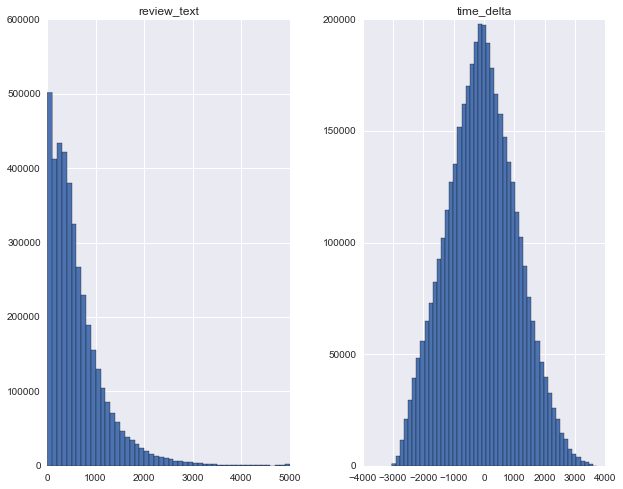

In [57]:
X.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1cd8c7390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x266939990>]], dtype=object)

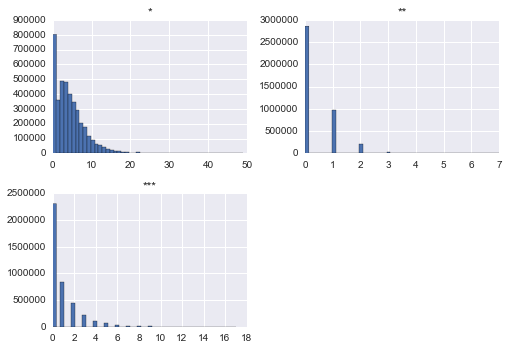

In [221]:
y.hist(bins=50)

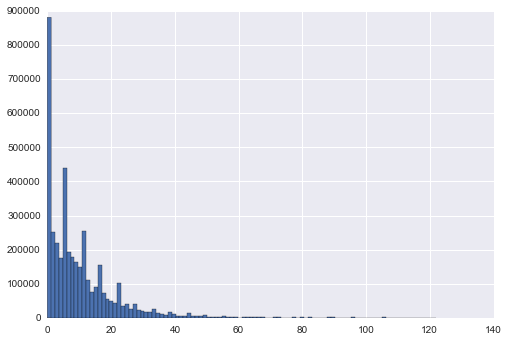

In [155]:
trans_y.hist(bins=100)

In [226]:
plt.plot(X['review_text'], y['**'], '.', alpha=.5)

NameError: name 'X' is not defined

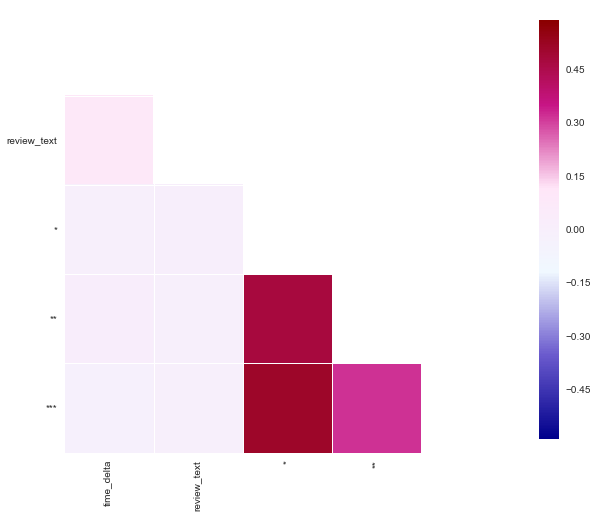

In [169]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.blend_palette(["#00008B", "#6A5ACD", "#F0F8FF",
                          "#FFE6F8", "#C71585", "#8B0000"], as_cmap=True)
sns.corrplot(data, annot=False, diag_names=False, cmap=cmap)
ax.grid(False);

In [9]:
import text_processors
tfidf_matrix = text_processors.load_tfidf_matrix()

In [10]:
from sklearn.cross_validation import cross_val_score
np.mean(cross_val_score(LinearRegression(), X, y, cv=3))

-0.0012309889619115388

In [37]:
scr_lst = []
for i in y.columns.tolist():
    scr_lst.append(np.mean(cross_val_score(LinearRegression(), X, y[i], cv=3)))

In [39]:
scr_lst

[-0.0012243804254890762, -0.00029430434557065066, -0.0014663357924205773]

In [53]:
m2 = LinearRegression().fit(X, y['***']).predict(X_test)
pd.DataFrame(m2).head()

,0
0,0.892943
1,0.867476
2,0.922157
3,0.896690
4,0.925227


In [18]:
X_test, y_test = pull_features(test_df)

In [19]:
predictions = model.predict(X_test)
# predictions = np.clip(predictions, 0, np.inf)
# try clipping after averaging scores also

In [20]:
pd.DataFrame(predictions).head()

,0,1,2
0,4.237228,0.388498,0.892943
1,4.201040,0.398774,0.867476
2,4.265308,0.377573,0.922157
3,4.229120,0.387848,0.896690
4,4.338169,0.371937,0.925227


In [73]:
new_submission = data_grab.get_submission().copy()
# train_labels, train_targets = data_grab.get_response()

In [188]:
temp_df = test_df.copy()
temp_df[['*','**','***']] = predictions

In [208]:
submit_scores = temp_df.groupby(['restaurant_id', 'inspection_date', 'inspection_id'])['*','**','***'].mean()

In [178]:
temp = submit_scores.reset_index().set_index('inspection_id')
indexed = temp.reindex(new_submission.index)

In [85]:
indexed.head()

,restaurant_id,inspection_date,*,**,***
id,,,,,
14916,nkOvZOBW,2014-12-17,4.271066,0.379941,0.913390
29767,WwOaAnOB,2013-12-30,4.276481,0.377986,0.918537
29338,we39kvOk,2011-04-08,4.314311,0.368737,0.940380
7219,dj3d5Xo9,2013-12-30,4.260858,0.384555,0.900714
20979,XJ3rBW3R,2008-03-31,4.316896,0.369364,0.937839


In [95]:
new_submission.iloc[:, -3:] = np.round(indexed[['*','**','***']]).astype(int)

In [96]:
new_submission.head()

,date,restaurant_id,*,**,***
id,,,,,
14916,2014-12-17,nkOvZOBW,4,0,1
29767,2013-12-30,WwOaAnOB,4,0,1
29338,2011-04-08,we39kvOk,4,0,1
7219,2013-12-30,dj3d5Xo9,4,0,1
20979,2008-03-31,XJ3rBW3R,4,0,1


In [97]:
new_submission.to_csv('predictions/ols.csv')

In [115]:
#finish plots then work on feature transfomration
# make sure that all of the submission restaurants are in the training set
# jitter plots
# make feature combining algorithm to choose which increase accuracy
# with predicted scores clipped before and after averaging
# with and without restaurant_id_number included. technically dont need it because each row corresponds with a restaurant

In [205]:
train_df.shape

(4071065, 142)